# Prerequesites
1. Visual studio code tutorial (https://code.visualstudio.com/docs/introvideos/basics).
2. Python extension for VS Code (https://marketplace.visualstudio.com/items?).

### Creating a graph

Create an empty graph with no nodes and no edges.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

## Karate club visualization

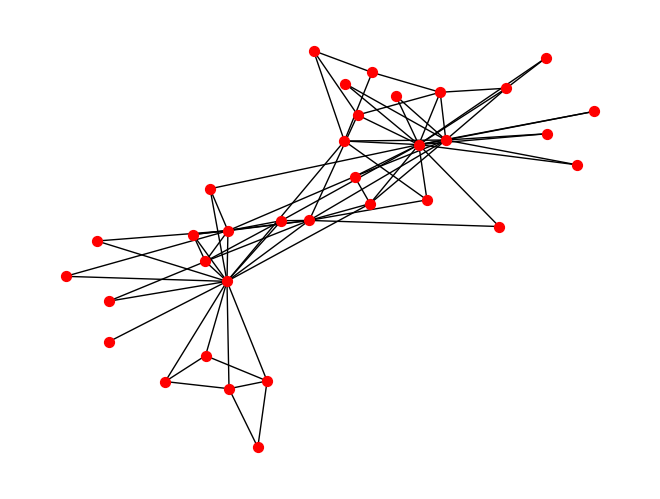

In [2]:
from pylab import *
import networkx as nx
options = {
    'node_color': 'red',
    'node_size': 50,
    'width': 1,
}
g = nx.karate_club_graph()
nx.draw(g, **options)
show()

## Network Layout

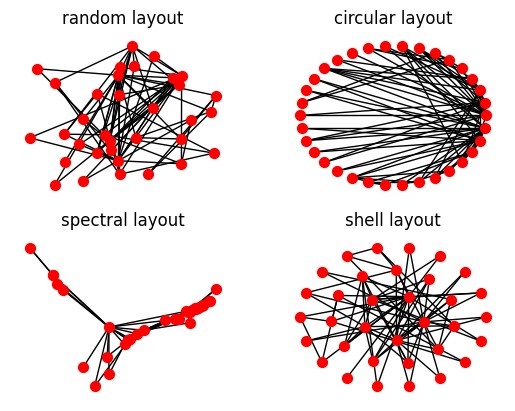

In [28]:
g = nx.karate_club_graph()
subplot(2, 2, 1)
nx.draw_random(g,**options)
plt.title('random layout')
subplot(2, 2, 2)
nx.draw_circular(g,**options)
title('circular layout')
subplot(2, 2, 3)
nx.draw_spectral(g,**options)
title('spectral layout')
subplot(2, 2, 4)
shells = [[0, 1, 2, 32, 33],
[3, 5, 6, 7, 8, 13, 23, 27, 29, 30, 31],
[4, 9, 10, 11, 12, 14, 15, 16, 17, 18,
19, 20, 21, 22, 24, 25, 26, 28]]
nx.draw_shell(g,**options, nlist = shells)
title('shell layout')
show()

## Network drawing options

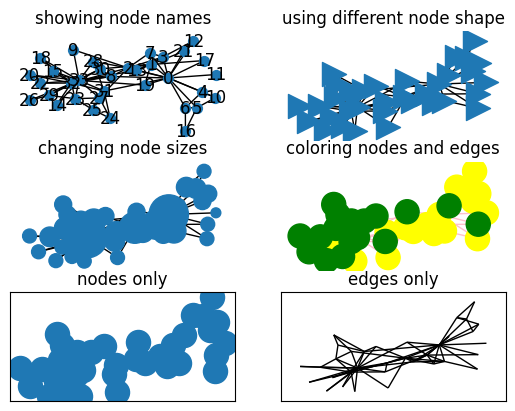

In [29]:
g = nx.karate_club_graph()
positions = nx.spring_layout(g)
subplot(3, 2, 1)
nx.draw(g, node_size = 50, with_labels = True)
title('showing node names')
subplot(3, 2, 2)
nx.draw(g, positions, node_shape = '>')
title('using different node shape')
subplot(3, 2, 3)
nx.draw(g, positions,
node_size = [g.degree(i) * 50 for i in g.nodes()])
title('changing node sizes')
subplot(3, 2, 4)
nx.draw(g, positions, edge_color = 'pink',
    node_color = ['yellow' if i < 17 else 'green' for i in g.nodes()])
title('coloring nodes and edges')
subplot(3, 2, 5)
nx.draw_networkx_nodes(g, positions)
title('nodes only')
subplot(3, 2, 6)
nx.draw_networkx_edges(g, positions)
title('edges only')
show()


## Assignment

Visualize the following graphs. Look them up in NetworkX’s online documentation to learn how to generate them.

1. A “hypercube graph” of four dimensions.
2. A “ladder graph” of length 5.
3. A “barbell graph” made of two 20-node complete graphs that are connected
by a single edge.
4. A “wheel graph” made of 100 nodes.


DegreeView({(0, 0, 0, 0): 4, (0, 0, 0, 1): 4, (0, 0, 1, 0): 4, (0, 0, 1, 1): 4, (0, 1, 0, 0): 4, (0, 1, 0, 1): 4, (0, 1, 1, 0): 4, (0, 1, 1, 1): 4, (1, 0, 0, 0): 4, (1, 0, 0, 1): 4, (1, 0, 1, 0): 4, (1, 0, 1, 1): 4, (1, 1, 0, 0): 4, (1, 1, 0, 1): 4, (1, 1, 1, 0): 4, (1, 1, 1, 1): 4})

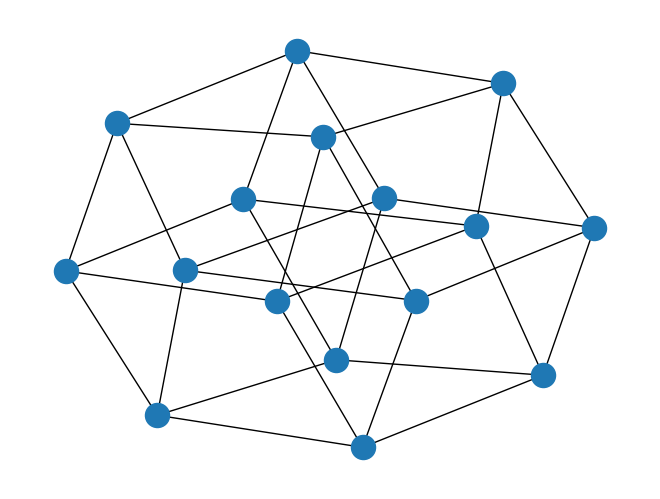

In [8]:
# Create a hypercube graph of dimension 4
G = nx.hypercube_graph(4)
nx.draw(G)
nx.degree(G)
# Print the adjacency matrix
#print("Adjacency matrix:")
#print(nx.adjacency_matrix(G).todense())

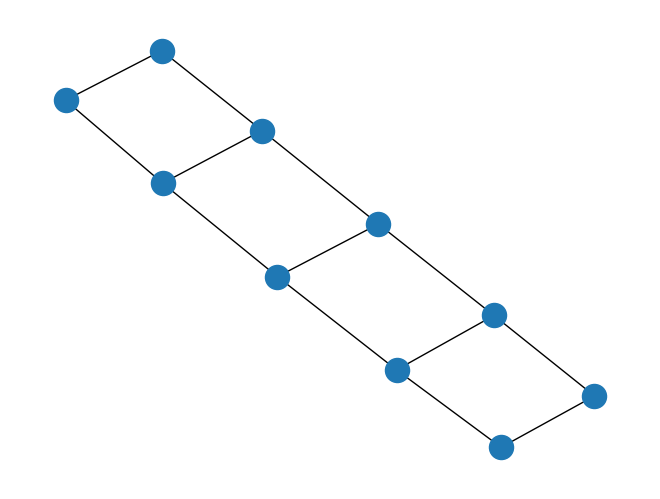

In [9]:
G = nx.ladder_graph(5)
nx.draw(G)

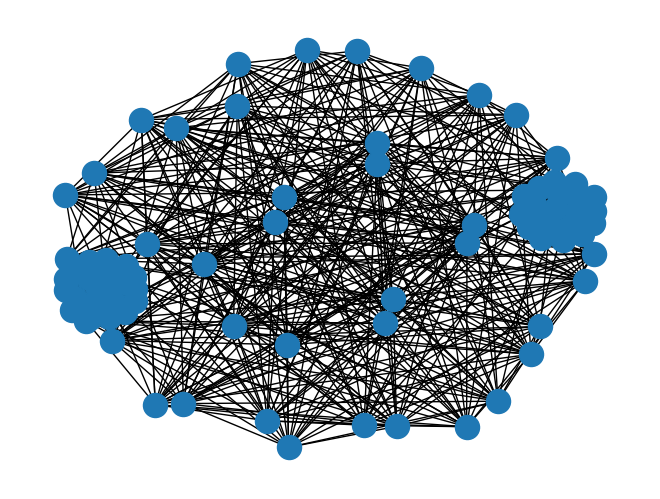

In [15]:
# Create two complete graphs of 20 nodes each
G1 = nx.complete_graph(20)
G2 = nx.complete_graph(20)

# Connect the two complete graphs with a single edge
G = nx.disjoint_union(G1, G2)
G.add_edge(max(G1.nodes), max(G2.nodes))
nx.draw(G1)
nx.draw(G2)
nx.draw(G)

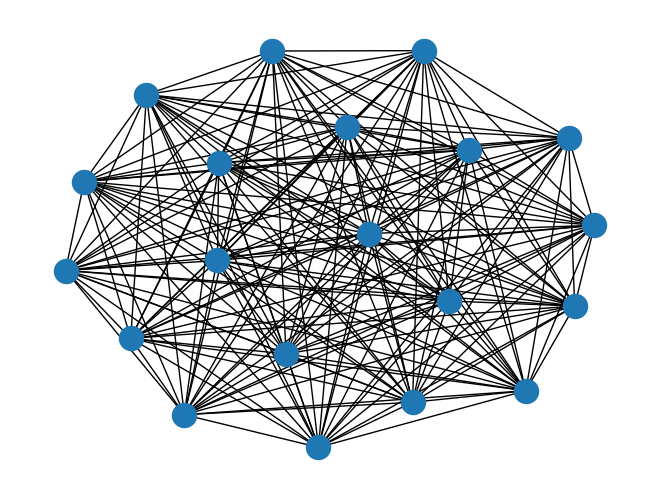

In [17]:
nx.draw(G1)

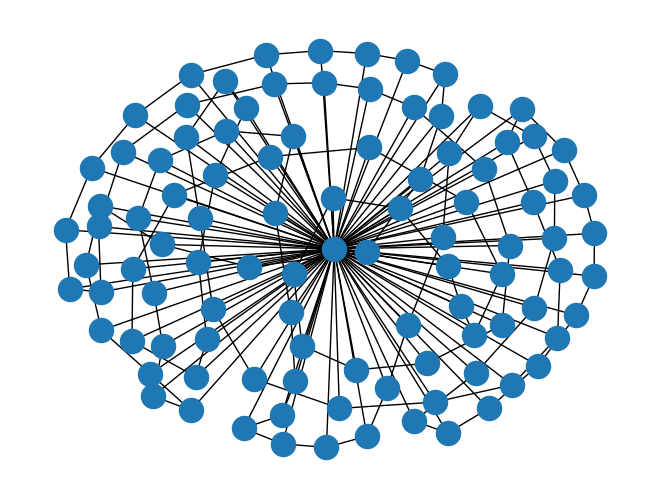

In [18]:
G = nx.wheel_graph(100)
nx.draw(G)

# Importing and exporting network data

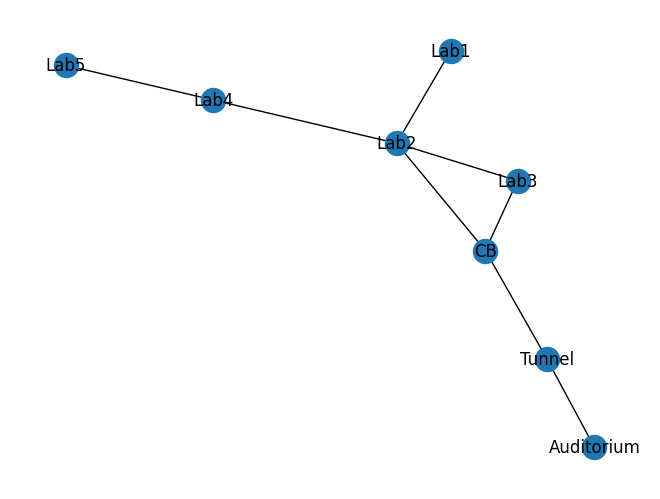

In [30]:
g = nx.read_adjlist('OIST.csv', delimiter = ',')
nx.draw(g, with_labels = True)
show()


## Directed Graph

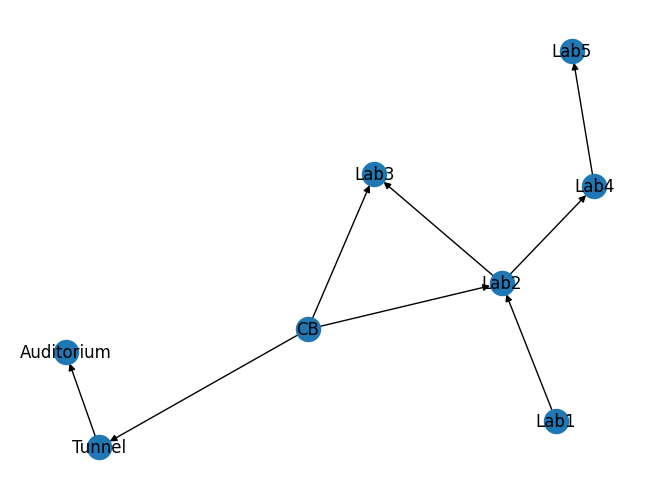

In [31]:
g = nx.read_adjlist('OIST.csv', delimiter = ',',
create_using = nx.DiGraph())
nx.draw(g, with_labels = True)
show()

In [32]:
g = nx.complete_graph(5)
nx.write_adjlist(g, 'complete-graph.txt')

## Generating random graphs

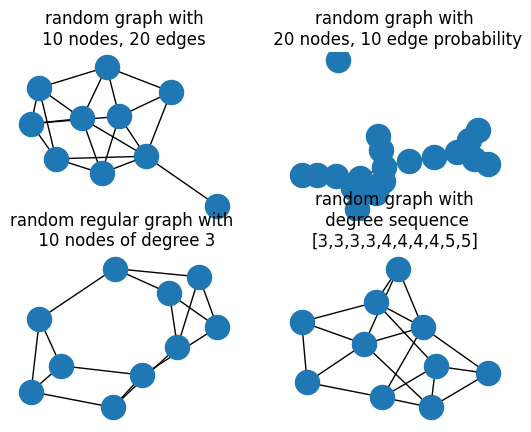

In [33]:
subplot(2, 2, 1)
nx.draw(nx.gnm_random_graph(10, 20))
title('random graph with\n10 nodes, 20 edges')
subplot(2, 2, 2)
nx.draw(nx.gnp_random_graph(20, 0.1))
title('random graph with\n 20 nodes, 10 edge probability')
subplot(2, 2, 3)
nx.draw(nx.random_regular_graph(3, 10))
title('random regular graph with \n 10 nodes of degree 3')
subplot(2, 2, 4)
nx.draw(nx.random_degree_sequence_graph([3,3,3,3,4,4,4,4,5,5]))
title('random graph with\n degree sequence\n[3,3,3,3,4,4,4,4,5,5]')
show()

## Small World network

What is Small World Phenomenon ? Small World Phenomenon is the study and notion that we are all connected via a small number of edges. There have been three notable experiments to prove the Small World Phenomenon :

1. Milgram Small World Phenomenon Experiment : 296 randomly chosen persons were asked to forward a letter to a ‘target’ person (a Stockbroker in Boston). The letter was to be sent directly to him if the person was known personally, otherwise, the letter was to be sent to someone who has a higher probability of knowing him personally. 64 letters reached the target person with a median length of 6 ie. on average a random person was connected to the target person via 6 people in between.
2. Microsoft Instant Messenger Experiment : There are 240 million active users of Microsoft Instant Messenger. They are connected if two users were engaged in a 2-way communication over the period of a month. For any two random people, the median distance was 7 i.e. 2 random people were connected via 7 intermediate connections.
3. Facebook based Experiment : The experiment conducted by Facebook calculated the average path length to be 5.28 in 2008 whereas it reduced to be 4.74 in 2011.
4. Ref: https://www.geeksforgeeks.org/small-world-model-using-python-networkx/

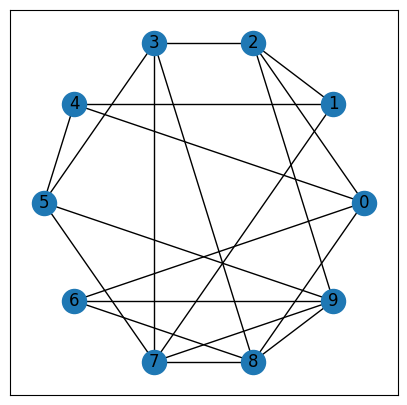

In [34]:
G = nx.watts_strogatz_graph(n = 10, k = 4, p = 0.5)
pos = nx.circular_layout(G)
 
plt.figure(figsize = (5, 5))
nx.draw_networkx(G, pos)

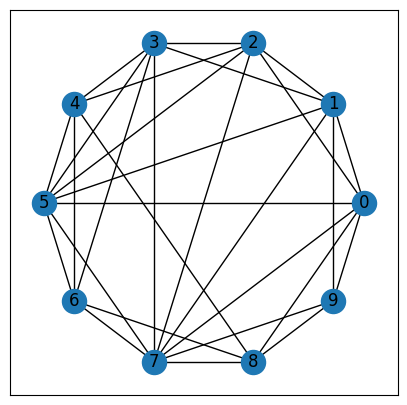

In [35]:
G = nx.newman_watts_strogatz_graph(n=10, k=4, p=0.5)
pos = nx.circular_layout(G)
 
plt.figure(figsize = (5, 5))
nx.draw_networkx(G, pos)

## Scale-Free Networks

### What is a Scale-Free Network?

Just as Social Networks have Influencers (profiles with extremely high connectivity), P2P networks over time also tend to garner a small subset of nodes with disproportionately high connectivity whereas rest of the network connectivity stays low. Cornerstones of P2P Network Analysis speaks about how you can analyze such a network — for instance by looking at the “Degree Distribution” which is the probability distribution of the number of node-connections across the network. If this probability distribution resembles “Power Law” then we call the network “Scale Free” or a “Power Law” network.

Ref: https://medium.com/@saptarshichaudhuri/building-a-scale-free-network-using-python-b305e31042a1

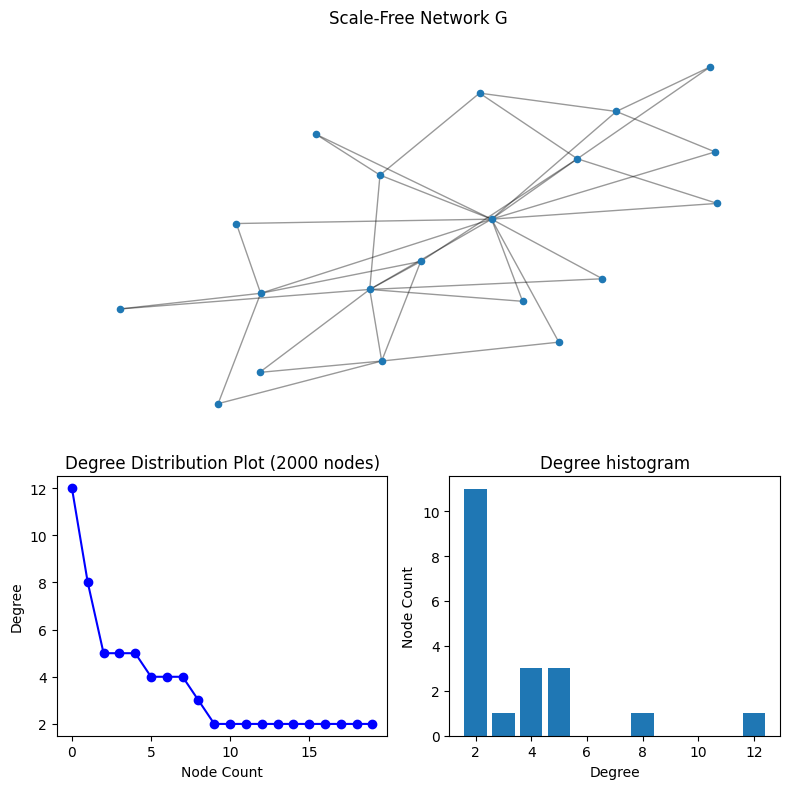

In [36]:
G = nx.barabasi_albert_graph(n = 20, m = 2, seed=10374196, initial_graph = None)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Scale-Free Network G")
ax0.set_axis_off()
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Distribution Plot (2000 nodes)")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Node Count")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Node Count")
fig.tight_layout()
plt.show()

##  Barabási–Albert algorithm (High-level)

1. Initialization: We start with a random graph of “m = 2” nodes.

2. Preferential Attachment: At each step, we attach a node with “m=2” edges to the graph. Nodes with a higher degree (more pre-existing edges) are preferred (with probability directly proportional to the node’s degree) to receive these 2 edges (thus preferential attachment).

3. Termination: We repeat this process until the graph has a total of “n=20” nodes.

References

[1]. https://en.wikipedia.org/wiki/Scale-free_network

[2]. https://en.wikipedia.org/wiki/Degree_distribution

[3].https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model#cite_note-Barabasi1999-3

[4]. Albert, Réka; Barabási, Albert-László (2002). “Statistical mechanics of complex networks”. Reviews of Modern Physics

[5].https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html

[6]. https://blogs.cornell.edu/info2040/2014/09/08/the-limitations-of-using-random-graphs-to-model-real-world-networks/